<a href="https://colab.research.google.com/github/aisha-batool/PIAIC-Quarter2-LangChain/blob/main/langchain_project_1_piaic_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

In [ ]:
!pip install langchain_google-genai

In [ ]:
# Adding ConversationBufferMemory to store communication.

from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()

In [ ]:
# Using GoogleGenerativeAI

from langchain_google_genai import GoogleGenerativeAI

llm = GoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = 'gemini-1.5-flash',
    temperature = 0.5,
    maxtokens = 100
)

response = llm.invoke("What is machine learning")
print(response)

# Saving the conversation...
memory.save_context({"input": "What is machine learning"}, {"output": response})

Machine learning (ML) is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.  Instead of being explicitly programmed, ML systems learn from data.  They identify patterns, make predictions, and improve their performance over time without being explicitly told how to do so.

Here's a breakdown of key aspects:

* **Data-driven:** ML algorithms learn from data.  The more data they are trained on, the better they typically perform.  This data can be structured (like tables in a database) or unstructured (like images or text).

* **Algorithms:** These are the sets of rules and statistical techniques that ML systems use to learn from data.  Different algorithms are suited to different types of problems and data.  Examples include linear regression, decision trees, support vector machines, and neural networks.

* **Learning:** This is the process by which the algori

In [ ]:
# Doing same using ChatGoogleGenerativeAI

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = 'gemini-1.5-flash',
    temperature = 0.5,
    # max_output_tokens = 100
)

response = llm.invoke("What is machine learning")
print(response.content)

# Saving the conversation...
memory.save_context({"input": "What is machine learning"}, {"output": response.content})

Machine learning (ML) is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.  Instead of being explicitly programmed, machine learning algorithms use statistical techniques to find patterns and make predictions based on input data.

Here's a breakdown of key aspects:

* **Data-driven:** ML relies heavily on data.  The more data it's trained on, the better it generally performs.  This data can be structured (like tables in a database) or unstructured (like images or text).

* **Algorithms:** These are the sets of rules and statistical techniques that the machine uses to learn from the data.  Different algorithms are suited to different types of problems and data.

* **Learning from data:**  Instead of being given explicit instructions, the algorithm learns from the data by identifying patterns, relationships, and trends.  This learning process can be supervis

In [ ]:
# Now, lets try using PromptTemplate.. Installing required frameworks.

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

llm = ChatGoogleGenerativeAI (
    api_key = GEMINI_API_KEY,
    model = 'gemini-1.5-flash',
    temperature = 0.5,
    maxtokens = 77
)

In [ ]:
# Using LLM directly...

response = llm.invoke("what is AI?")
print(response.content)

# Saving the conversation...
memory.save_context({"input": "What is AI"}, {"output": response.content})

Artificial intelligence (AI) is a broad field encompassing the development of computer systems capable of performing tasks that typically require human intelligence.  These tasks include:

* **Learning:** Acquiring information and rules for using the information.
* **Reasoning:** Using rules to reach approximate or definite conclusions.
* **Problem-solving:** Finding solutions to complex situations.
* **Perception:** Interpreting sensory information (like images, sound, and text).
* **Language understanding:** Processing and generating human language.

AI systems achieve these capabilities through various techniques, including:

* **Machine learning (ML):** Algorithms that allow computers to learn from data without explicit programming.  This includes subfields like deep learning (using artificial neural networks with many layers) and reinforcement learning (learning through trial and error).
* **Natural language processing (NLP):** Enabling computers to understand, interpret, and gene

In [ ]:
# This is a Simple Sequential Chain
first_prompt = PromptTemplate (
    input_variables = ["question"],
    template = "Write 5 keypoints about this {question}."
)

# Creating a chain of prompt template with llm
first_chain = first_prompt | llm

In [ ]:
# Now our response is tailored according to our defined prompt template!
first_response = first_chain.invoke({"question": "what is AI?"})
print(first_response.content)

# Saving the conversation...
memory.save_context({"input": "Write 5 keypoints about this 'What is AI'"}, {"output": first_response.content})

Five key points about what AI is:

1. **AI is about mimicking human intelligence:**  AI systems are designed to perform tasks that typically require human intelligence, such as learning, problem-solving, decision-making, and understanding language.  They achieve this through algorithms and statistical models.

2. **AI relies on data:** AI systems learn from vast amounts of data.  The more data they are trained on, the better they become at performing their tasks.  The quality and quantity of this data are crucial to the success of an AI system.

3. **AI encompasses various techniques:**  AI is not a single technology but a broad field encompassing many approaches, including machine learning (where systems learn from data without explicit programming), deep learning (using artificial neural networks with multiple layers), natural language processing (understanding and generating human language), and computer vision (interpreting images and videos).

4. **AI has a wide range of applicati

In [ ]:
# Now we are sending the response of first chain to the second chain..
second_prompt = PromptTemplate (
    input_variables = ["response"],
    template = "Explain each point in detail of this {response}."
)

second_chain = second_prompt | llm

In [ ]:
second_response = second_chain.invoke({"response": first_response.content})
print(second_response.content)

# Saving the conversation...
memory.save_context({"input": "Explain each point in detail of this " + first_response.content}, {"output": second_response.content})

Let's break down each of the five key points about AI in detail:

**1. AI is about mimicking human intelligence:**

This point emphasizes the core goal of Artificial Intelligence: to create systems that can perform tasks that typically require human intelligence.  This isn't about creating conscious or sentient machines (at least not yet), but rather about replicating specific cognitive abilities.  Let's examine the key aspects:

* **Learning:**  Human intelligence involves learning from experience. AI systems, particularly those based on machine learning, do the same. They analyze data, identify patterns, and adjust their behavior accordingly without explicit programming for each specific scenario.  For example, a spam filter learns to identify spam emails by analyzing patterns in previous emails marked as spam.

* **Problem-solving:** Humans solve problems by analyzing situations, identifying constraints, and devising solutions. AI systems can do this too, using algorithms and heuris

In [ ]:
# Generating better images using langchain chaining...

first_prompt = PromptTemplate (
    input_variables = ["question"],
    template = "Transform the following question into a detailed and creative image description that can be used to generate a visual: {question}. Include key visual elements, atmosphere, colors, lighting, and any other relevant details to guide the image generation."
)

second_prompt = PromptTemplate (
    input_variables = ["response"],
    template = "Read the following detailed image description and summarize it into two short and precise lines that capture the most important visual elements. The summary should include key imagery and style, providing a clear direction for generating an image: {response}"
)

# third_prompt = PromptTemplate (
#     input_variables = ["summary"],
#     template = "Generate the image with following description: {summary}"
# )

first_chain = first_prompt | llm
second_chain = second_prompt | llm
# third_chain = third_prompt | llm

image_prompt = input("Write an image prompt: ")

first_response = first_chain.invoke({"question": image_prompt})
print("First Chain:", first_response.content)

second_response = second_chain.invoke({"response": first_response.content})
print("Second Chain:", second_response.content)

# Since this third_response is not generating images since it is out of our LLM capability,
# we will not use prompt and instead use a tool now to generate the image.

# third_response = third_chain.invoke({"summary": second_response.content})
# print("Third Chain:", third_response.content)

# Saving the conversation
memory.save_context({"input": "Change this " + image_prompt + " into a good image generative prompt."}, {"output": first_response.content})
memory.save_context({"input": "Read this " + first_response.content + " and summarize into two lines so image could be generated on the resultant response."}, {"output": second_response.content})

Write an image prompt: stars in galaxy
First Chain: ## Image Description: A Tapestry of Stardust

**Concept:** A breathtaking close-up view of a section of a vibrant spiral galaxy, teeming with stars of varying sizes, ages, and colors.  The focus is on the density and diversity of the stellar population, showcasing the beauty and complexity of galactic structure.

**Visual Elements:**

* **Stars:** Myriad stars of diverse sizes and colors.  Include brilliant blue giants, fiery red supergiants, and countless smaller, yellowish main-sequence stars.  Some stars should be sharply defined, while others are blurred by distance, creating a sense of depth.  A few exceptionally bright stars should have noticeable diffraction spikes.
* **Nebulae:**  Intersperse areas of vibrant nebulae – swirling clouds of gas and dust in shades of pink, purple, blue, and green.  These nebulae should be rendered with a delicate, almost ethereal quality, suggesting both luminosity and translucence.  Some nebulae 

In [ ]:
# Display the saved conversation
memory.load_memory_variables({})


{'history': 'Human: What is machine learning\nAI: Machine learning (ML) is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.  Instead of being explicitly programmed, ML systems learn from data.  They identify patterns, make predictions, and improve their performance over time without being explicitly told how to do so.\n\nHere\'s a breakdown of key aspects:\n\n* **Data-driven:** ML algorithms learn from data.  The more data they are trained on, the better they typically perform.  This data can be structured (like tables in a database) or unstructured (like images or text).\n\n* **Algorithms:** These are the sets of rules and statistical techniques that ML systems use to learn from data.  Different algorithms are suited to different types of problems and data.  Examples include linear regression, decision trees, support vector machines, and neural networks.

In [ ]:
# Using text to image library from huggingface: https://huggingface.co/CompVis/stable-diffusion-v1-4
!pip install --upgrade diffusers transformers scipy

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = second_response.content
image = pipe(prompt).images[0]

image.save("img.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

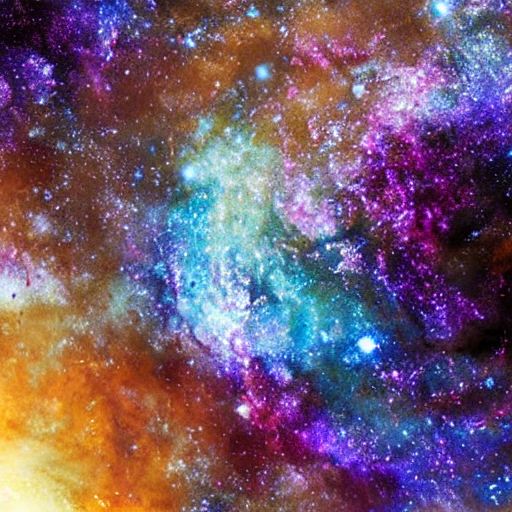

In [ ]:
image

### Exploring langchain use with LLAMA

In [ ]:
!pip install langchain-community

In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

!pip install colab-xterm -qqq
!pip install langchain -qqq
!pip install langchain_community -qqq

In [ ]:
%xterm

# commands to write on terminal:
# curl https://ollama.ai/install.sh | sh
# ollama serve &
# ollama pull llama2

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
# Using LLAMA
import os
os.environ["OLLAMA_HOST"] = "127.0.0.1:11434"

from langchain_community.llms import Ollama

llm = Ollama(model="llama2")

In [ ]:
response = llm.invoke("What is machine learning")
print(response)

Machine learning is a subfield of artificial intelligence (AI) that involves the use of algorithms and statistical models to enable machines to learn from data, make decisions, and improve their performance on a specific task over time. Machine learning algorithms are designed to recognize patterns in data and learn from it, without being explicitly programmed to do so.

The goal of machine learning is to automate the process of extracting insights and knowledge from data, allowing machines to perform tasks that would otherwise require human intelligence, such as:

1. Image recognition: Machine learning algorithms can be trained to recognize objects, people, and scenes in images, improving their accuracy over time.
2. Natural language processing: Machine learning can be used to analyze and understand natural language, enabling machines to perform tasks such as text classification, sentiment analysis, and machine translation.
3. Predictive modeling: Machine learning algorithms can be tr

In [ ]:
first_prompt = PromptTemplate (
    input_variables = ["question"],
    template = "Write 5 keypoints about this {question}."
)

# Creating a chain of prompt template with llm
first_chain = first_prompt | llm

In [ ]:
first_response = first_chain.invoke({"question": "what is AI?"})
print(first_response)


 Sure, here are five key points about artificial intelligence (AI):

1. Artificial Intelligence is a branch of computer science that focuses on creating intelligent machines that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making.
2. AI systems use algorithms and statistical models to analyze data, learn from it, and make decisions or predictions based on that data. They can be applied to a wide range of industries and tasks, including image recognition, natural language processing, and autonomous vehicles.
3. AI has the potential to revolutionize many areas of our lives, from healthcare and education to finance and transportation. For example, AI-powered medical diagnosis systems can analyze medical images and patient data to identify diseases earlier and more accurately than human doctors.
4. However, AI also raises important ethical and societal questions, such as the potential for bias in decision-making, the impact 